In [1]:
import xarray as xr
import datetime
import numpy as np
from pyproj import Proj, Transformer, CRS
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info
import rasterio
from shapely.geometry import Point
import geopandas as gpd
import os
import glob
from zipfile import ZipFile
import pandas as pd
import matplotlib.pylab as plt
import shapely
import scipy.interpolate

In [2]:
toposcale_path = '../shyft_workspace_copy/shyft_workspace/shyft-data/netcdf/orchestration-testdata/TopoSCALE_BG.nc'
topo_ds = xr.open_dataset(toposcale_path)

In [3]:
dates = []
start_date = datetime.datetime(1999,1,1)
sec_since_epoch = datetime.datetime.timestamp(start_date)
delta_seconds = topo_ds.t.values * 60 * 60

for i in delta_seconds:
    time = sec_since_epoch + i
    time = np.datetime64(datetime.datetime.fromtimestamp(time))
    dates.append(time)
    
dates = np.array(dates)

In [4]:
ds_drop = topo_ds.drop(['mask', 'latg', 'long'])

In [5]:
ds_drop['T'] = ds_drop['T'] * 0.01
ds_drop['U'] = ds_drop['U'] * 0.01
ds_drop['q'] = ds_drop['q'] * 10**-6
ds_drop['SW'] = ds_drop['SW'] * 0.1
ds_drop['P'] = ds_drop['P'] * 0.01
ds_drop['P'] = ds_drop['P'] * 100

In [6]:
new_pixels = np.arange(0,7876)

In [7]:
ds_c = ds_drop.assign_coords(lonp = ds_drop.lonp)
ds_c = ds_c.assign_coords(latp = ds_c.latp)

In [8]:
ds_new = ds_drop.drop(['latc', 'lonc'])
ds_new = ds_new.assign_coords(t = ds_new.t)
ds_new = ds_new.assign_coords(t = dates)

In [9]:
ds_cn1 = ds_new.isel(t=0).where(ds_new.cn == 1, drop = True)
#ds_cn1 = ds_cn1.set_index(location=['lonp', 'latp'])
#ds_cn1 = ds_cn1.unstack('location')

In [10]:
x = np.array([])
y = np.array([])

x_start = 250828
y_start = 3100180
step_x = 1000
step_y = 1000
nx = 105
ny = 105

x = np.linspace(x_start, x_start + step_x * nx, nx)
y = np.linspace(y_start, y_start + step_y * ny, ny)

In [11]:
crs_4326 = CRS.from_epsg(4326) # Lat-lon
crs_32645 = CRS.from_epsg(32645) # CRS 

## Create transformer to convert from CRS to CRS

transformer = Transformer.from_crs(crs_32645, crs_4326, always_xy = True)

lon, lat = transformer.transform(x, y)
lon = lon[:-30]

lon_min = np.min(lon)
lon_max = np.max(lon)
lat_min = np.min(lat)
lat_max = np.max(lat)

# New grid
lon_grid, lat_grid = np.meshgrid(lon, lat)
empty_grid_cn = np.zeros((75, 105))

In [105]:
# First grid cell

lon_g_min = lon_grid[0][0]
lon_g_max = lon_grid[0][0]
lat_g_min = lat_grid[0][0]
lat_g_max = lat_grid[0][0]

In [110]:
pixels = ds_cn1.pixels.values
lonp = ds_cn1.lonp.values
latp = ds_cn1.latp.values
cn1 = ds_cn1.cn.values

# Old grid

lonp_grid, latp_grid = np.meshgrid(lonp, latp)

In [115]:
new_grid = scipy.interpolate((lon_grid.flatten(), lat_grid.flatten()), cn1, (lonp_grid, latp_grid), method ='nearest' )

TypeError: 'module' object is not callable

In [107]:
pixels

array([   0,    1,    2, ..., 4664, 4665, 4666])

In [97]:
len(ds_cn1.lonp)

4667

In [98]:
np.sum(ds_cn1.sel(lonp = slice(lon_g_min, lon_g_max), latp = slice(lon_g_min, lon_g_max)).cn.compute())

KeyError: "'lonp' is not a valid dimension or coordinate"

In [30]:
x = np.array([])
y = np.array([])

x_start = 250828
y_start = 3100180
step_x = 1000
step_y = 1000
nx = 105
ny = 105

x = np.linspace(x_start, x_start + step_x * nx, nx)
y = np.linspace(y_start, y_start + step_y * ny, ny)

In [31]:
crs_4326 = CRS.from_epsg(4326) # Lat-lon
crs_32645 = CRS.from_epsg(32645) # CRS 

## Create transformer to convert from CRS to CRS

transformer = Transformer.from_crs(crs_32645, crs_4326, always_xy = True)

lon, lat = transformer.transform(x, y)
lon = lon[:-30]

lon_min = np.min(lon)
lon_max = np.max(lon)
lat_min = np.min(lat)
lat_max = np.max(lat)

# New grid
lon_grid, lat_grid = np.meshgrid(lon, lat)
empty_grid_cn = np.zeros((75, 105))

In [16]:
lon

array([84.46615173, 84.47619809, 84.48624618, 84.49629598, 84.50634752,
       84.51640077, 84.52645576, 84.53651247, 84.5465709 , 84.55663107,
       84.56669296, 84.57675659, 84.58682195, 84.59688903, 84.60695786,
       84.61702841, 84.6271007 , 84.63717473, 84.64725049, 84.65732799,
       84.66740722, 84.6774882 , 84.68757091, 84.69765537, 84.70774157,
       84.71782951, 84.72791919, 84.73801062, 84.74810379, 84.75819871,
       84.76829538, 84.77839379, 84.78849395, 84.79859587, 84.80869953,
       84.81880494, 84.82891211, 84.83902102, 84.8491317 , 84.85924412,
       84.86935831, 84.87947425, 84.88959194, 84.8997114 , 84.90983261,
       84.91995559, 84.93008032, 84.94020682, 84.95033508, 84.9604651 ,
       84.97059689, 84.98073044, 84.99086576, 85.00100284, 85.0111417 ,
       85.02128232, 85.03142471, 85.04156888, 85.05171481, 85.06186252,
       85.072012  , 85.08216325, 85.09231628, 85.10247108, 85.11262766,
       85.12278602, 85.13294616, 85.14310808, 85.15327177, 85.16

In [13]:
ds_new

<xarray.Dataset>
Dimensions:  (t: 149016, clusters: 200, pixels: 7876)
Coordinates:
  * pixels   (pixels) int64 0 1 2 3 4 5 6 ... 7869 7870 7871 7872 7873 7874 7875
  * t        (t) datetime64[ns] 1999-01-01 ... 2015-12-31T23:00:00
Dimensions without coordinates: clusters
Data variables:
    T        (t, clusters) float64 -20.42 -14.18 7.98 ... -18.75 -15.15 -18.11
    U        (t, clusters) float64 1.68 1.81 1.17 1.41 ... 6.3 10.23 2.07 2.22
    q        (t, clusters) float64 0.000457 0.000676 ... 0.000928 0.000336
    LW       (t, clusters) uint16 1111 1289 1749 1296 ... 1024 822 1253 1106
    SW       (t, clusters) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    P        (t, clusters) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ps       (t, clusters) uint16 575 645 838 607 494 ... 601 497 492 666 581
    latp     (pixels) float64 28.77 28.77 28.77 28.77 ... 28.86 28.86 28.86
    lonp     (pixels) float64 84.45 84.45 84.45 84.45 ... 84.5 84.5 84.5 84.5
    cn       (pixels) float64 104.0 104.0 104.0 104.0 ... 5.0 166.0 75.0 36.0
Attributes:
    name:              TopoSCALE_BG.nc
    contains:          Hourly "TopoSCALEd" ERA5 forcing at 90 m resolution fo...
    created by:        Kristoffer Aalstad
    created:           05-Jan-2023 21:35:51
    timestamps:        The dataare hourly starting on the 01.01.1999 00:00 UT...
    origin:            The data was TopoSCALed in Matlab using the TopoLAB to...
    acknowledgements:  Thanks to C3S & ECMWF for providing the ERA5 reanalysi...
    citation:          See Fiddes et al. (2022, https://doi.org/10.5194/gmd-1...
    contact:           kristoffer.aalstad@geo.uio.no for more information and...

In [5]:
cn = ds.cn.values.astype('int') -1 

In [84]:
T_cn = ds.T.sel(clusters = cn)

/Users/jacobqs/opt/miniconda3/envs/geohyd/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [85]:
T_cn = T_cn.rename({'clusters':'pixels'})

In [86]:
ds['T_cn'] = T_cn * 0.01

In [89]:
ds.T_cn.sel(t=0)

<xarray.DataArray 'T_cn' (pixels: 571612)>
dask.array<getitem, shape=(571612,), dtype=float64, chunksize=(571612,), chunktype=numpy.ndarray>
Dimensions without coordinates: pixels

In [6]:
latp = ds.latp.values
lonp = ds.lonp.values

In [10]:
cell_data_path = '/Users/jacobqs/Documents/MST Himalaya/WFDE5/Cell_Data/cell_data.nc'

In [11]:
cd_ds = xr.open_mfdataset(cell_data_path)

In [7]:
df = pd.DataFrame()
df['lonc'] = lonp
df['latc'] = latp
df['cn'] = cn

## Making a pyproj object for UTM Zone 45N

crs_4326 = CRS.from_epsg(4326) # Lat-lon
crs_32645 = CRS.from_epsg(32645) # CRS 

## Create transformer to convert from CRS to CRS

transformer = Transformer.from_crs(crs_4326, crs_32645, always_xy = True)

x, y = transformer.transform(lonp, latp)

df['x'] = x
df['y'] = y

# # Extracting only data within the area of interest
# x_min = np.min(x)
# x_max = np.max(x)
# y_min = np.min(y)
# y_max = np.max(y)

# x_min_grid = x_min - 500
# x_max_grid = x_max + 500
# y_min_grid = y_min - 500
# y_max_grid = y_max + 500

# x_grid = np.arange(x_min_grid, x_max_grid, 1000)
# y_grid = np.arange(y_min_grid, y_max_grid, 1000)

# df['x_grid'] = np.nan
# df['y_grid'] = np.nan

# # for i, val in enumerate(df['x']):
# #     x_dist = np.abs(df['x'][i] - x_grid)
# #     x_min_dist_inx = np.where(x_dist == np.min(x_dist))[0]
# #     df.loc[i, 'x_grid'] = x_grid[x_min_dist_inx]
# #     y_dist = np.abs(df['y'][i] - y_grid)
# #     y_min_dist_inx = np.where(y_dist == np.min(y_dist))[0]
# #     df.loc[i, 'y_grid'] = y_grid[y_min_dist_inx]

In [8]:
gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.x, df.y),
                       crs = '+proj=utm +zone=45 +ellps=WGS84 +datum=WGS84 +units=m +no_defs')

In [9]:
gdf = gdf.drop(columns = ['x', 'y', 'lonc', 'latc'])

In [10]:
gdf

,cn,geometry
0,103,POINT (250677.618 3185456.567)
1,103,POINT (250675.635 3185364.194)
2,103,POINT (250673.652 3185271.821)
3,103,POINT (250671.670 3185179.449)
4,43,POINT (250669.687 3185087.076)
...,...,...
571607,88,POINT (324553.848 3167017.724)
571608,59,POINT (324552.462 3166925.379)
571609,42,POINT (324551.076 3166833.033)
571610,42,POINT (324549.691 3166740.687)


In [11]:
xmin, ymin, xmax, ymax = gdf.total_bounds

In [12]:
# crs
crs = '+proj=utm +zone=45 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

In [21]:
# cell size
cell_size = 1000
# create the cells in a loop
grid_cells = []
xs = []
ys = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append(shapely.geometry.box(x0, y0, x1, y1)  )
        xs.append((x1-x0)/2 + x0)
        ys.append((y1-y0)/2 + y0)
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)

In [23]:
## Making a pyproj object for UTM Zone 45N

crs_4326 = CRS.from_epsg(4326) # Lat-lon
crs_32645 = CRS.from_epsg(32645) # CRS 

## Create transformer to convert from CRS to CRS

transformer = Transformer.from_crs(crs_32645, crs_4326, always_xy = True)

lon_cell, lat_cell = transformer.transform(xs, ys)

In [28]:
ds.sel(clusters = cn).T

/Users/jacobqs/opt/miniconda3/envs/geohyd/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


<xarray.DataArray 'T' (t: 149016, clusters: 571612)>
dask.array<getitem, shape=(149016, 571612), dtype=int16, chunksize=(149016, 571612), chunktype=numpy.ndarray>
Dimensions without coordinates: t, clusters
Attributes:
    long_name:  2 m air temperature [deg C]. Scale factor = 0.01

(246934.6138316556, 328277.593637801, 3095219.1259524855, 3208656.1876391307)

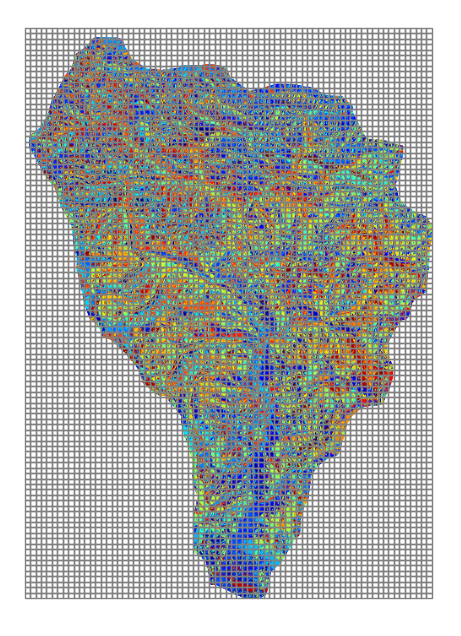

In [14]:
ax = gdf.plot(markersize=.1, figsize=(12, 8), column='cn', cmap='jet')
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [15]:
merged = gpd.sjoin(gdf, cell, how='left', op='within')

/Users/jacobqs/opt/miniconda3/envs/geohyd/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [16]:
cell

,geometry
0,"POLYGON ((249632.022 3100375.356, 249632.022 3..."
1,"POLYGON ((249632.022 3101375.356, 249632.022 3..."
2,"POLYGON ((249632.022 3102375.356, 249632.022 3..."
3,"POLYGON ((249632.022 3103375.356, 249632.022 3..."
4,"POLYGON ((249632.022 3104375.356, 249632.022 3..."
...,...
7870,"POLYGON ((323632.022 3200375.356, 323632.022 3..."
7871,"POLYGON ((323632.022 3201375.356, 323632.022 3..."
7872,"POLYGON ((323632.022 3202375.356, 323632.022 3..."
7873,"POLYGON ((323632.022 3203375.356, 323632.022 3..."


In [22]:
merged

,cn,geometry,index_right
0,103,POINT (250677.618 3185456.567),190.0
1,103,POINT (250675.635 3185364.194),189.0
2,103,POINT (250673.652 3185271.821),189.0
3,103,POINT (250671.670 3185179.449),189.0
4,43,POINT (250669.687 3185087.076),189.0
...,...,...,...
571607,88,POINT (324553.848 3167017.724),7836.0
571608,59,POINT (324552.462 3166925.379),7836.0
571609,42,POINT (324551.076 3166833.033),7836.0
571610,42,POINT (324549.691 3166740.687),7836.0


In [23]:
merged['n'] = 1

In [24]:
merged

,cn,geometry,index_right,n
0,103,POINT (250677.618 3185456.567),190.0,1
1,103,POINT (250675.635 3185364.194),189.0,1
2,103,POINT (250673.652 3185271.821),189.0,1
3,103,POINT (250671.670 3185179.449),189.0,1
4,43,POINT (250669.687 3185087.076),189.0,1
...,...,...,...,...
571607,88,POINT (324553.848 3167017.724),7836.0,1
571608,59,POINT (324552.462 3166925.379),7836.0,1
571609,42,POINT (324551.076 3166833.033),7836.0,1
571610,42,POINT (324549.691 3166740.687),7836.0,1


In [25]:
ds = ds.assign(index_right = ('pixels', merged['index_right']))

In [57]:
count = merged.groupby(['index_right', 'cn']).count()

In [58]:
prop = count.reset_index()

In [59]:
prop['sum'] = np.nan

In [60]:
for i, v in enumerate(prop['index_right'].unique()):
    tot = prop.loc[prop['index_right'] == v, 'n'].sum()
    prop.loc[prop['index_right'] == v, 'sum'] = tot

In [61]:
prop['prop'] = prop['n'] / prop['sum']

In [62]:
prop['cn'] = prop['cn'].astype(int)

In [63]:
prop = prop.set_index(['index_right', 'cn'])

In [64]:
prop_ds = prop.to_xarray()

In [65]:
prop_ds = prop_ds.expand_dims(dim = {'t':ds.t.values})

In [70]:
prop_ds

<xarray.Dataset>
Dimensions:      (t: 149016, index_right: 4471, cn: 200)
Coordinates:
  * t            (t) int64 0 1 2 3 4 5 ... 149011 149012 149013 149014 149015
  * index_right  (index_right) float64 186.0 187.0 188.0 ... 7.838e+03 7.839e+03
  * cn           (cn) int64 0 1 2 3 4 5 6 7 ... 192 193 194 195 196 197 198 199
Data variables:
    geometry     (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    n            (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    sum          (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    prop         (t, index_right, cn) float64 nan nan nan nan ... nan nan nan

In [71]:
temp= ds.T.sel(clusters= prop_ds.sel(t=0).cn.values - 1).rename({'clusters':'cn'})

In [72]:
temp

<xarray.DataArray 'T' (t: 149016, cn: 200)>
dask.array<getitem, shape=(149016, 200), dtype=int16, chunksize=(149016, 200), chunktype=numpy.ndarray>
Dimensions without coordinates: t, cn
Attributes:
    long_name:  2 m air temperature [deg C]. Scale factor = 0.01

In [73]:
prop_ds['T'] = temp

In [74]:
prop_ds

<xarray.Dataset>
Dimensions:      (index_right: 4471, cn: 200, t: 149016)
Coordinates:
  * index_right  (index_right) float64 186.0 187.0 188.0 ... 7.838e+03 7.839e+03
  * cn           (cn) int64 0 1 2 3 4 5 6 7 ... 192 193 194 195 196 197 198 199
  * t            (t) int64 0 1 2 3 4 5 ... 149011 149012 149013 149014 149015
Data variables:
    geometry     (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    n            (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    sum          (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    prop         (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    T            (t, cn) int16 dask.array<chunksize=(149016, 200), meta=np.ndarray>

In [52]:
prop_ds['T'] = temp

ValueError: cannot reindex or align along dimension 'index_right' because the (pandas) index has duplicate values

In [53]:
prop_ds

<xarray.Dataset>
Dimensions:      (t: 149016, index_right: 65862)
Coordinates:
  * t            (t) int64 0 1 2 3 4 5 ... 149011 149012 149013 149014 149015
  * index_right  (index_right) float64 186.0 186.0 187.0 ... 7.839e+03 7.839e+03
Data variables:
    cn           (t, index_right) int64 33 103 14 33 34 ... 110 133 135 152 171
    geometry     (t, index_right) int64 3 10 5 63 4 5 3 1 ... 5 10 6 1 1 10 3 1
    n            (t, index_right) int64 3 10 5 63 4 5 3 1 ... 5 10 6 1 1 10 3 1
    sum          (t, index_right) float64 13.0 13.0 99.0 99.0 ... 41.0 41.0 41.0
    prop         (t, index_right) float64 0.2308 0.7692 ... 0.07317 0.02439

In [38]:
prop_ds['T_scaled'] = prop_ds.T * prop_ds.sel(t=0).prop

In [39]:
prop_ds

<xarray.Dataset>
Dimensions:      (index: 65862, t: 149016)
Coordinates:
  * index        (index) int64 0 1 2 3 4 5 ... 65857 65858 65859 65860 65861
  * t            (t) int64 0 1 2 3 4 5 ... 149011 149012 149013 149014 149015
Data variables:
    index_right  (t, index) float64 186.0 186.0 187.0 ... 7.839e+03 7.839e+03
    cn           (t, index) int64 33 103 14 33 34 54 ... 88 110 133 135 152 171
    geometry     (t, index) int64 3 10 5 63 4 5 3 1 14 2 ... 1 5 10 6 1 1 10 3 1
    n            (t, index) int64 3 10 5 63 4 5 3 1 14 2 ... 1 5 10 6 1 1 10 3 1
    sum          (t, index) float64 13.0 13.0 99.0 99.0 ... 41.0 41.0 41.0 41.0
    prop         (t, index) float64 0.2308 0.7692 0.05051 ... 0.07317 0.02439
    T            (t, index) int16 dask.array<chunksize=(149016, 65862), meta=np.ndarray>
    T_scaled     (t, index) float64 dask.array<chunksize=(149016, 65862), meta=np.ndarray>

In [ ]:
prop_ds.assign(T = ds.T_cn)

: 

: 

In [120]:
temp_dict = dict()
for i in range(len(ds.t.values)):
    prop_df = prop.copy()
    prop_df['T_cn'] = ds.T.sel(t=i, clusters = prop_df['cn']-1).values * 0.01
    prop_df['T_scaled'] = prop_df['T_cn'] * prop_df['prop']
    df = pd.DataFrame()
    df['index_right'] = prop_df['index_right'].unique().copy()
    df['T'] = np.nan

    for i in df['index_right']:
        df.loc[df['index_right'] == i, 'T'] = prop_df.loc[prop_df['index_right'] == i, 'T_scaled'].sum()
    df['index_right'] = df.index
    df['index_right'] = df['index_right'].astype(int)
    df = df.set_index('index_right')
    cell_cp = cell.copy()
    cell_cp['T'] = np.nan
    cell_cp.loc[df.index.values, 'T'] = df['T'].values
    temp_dict[i] = cell_cp

KeyboardInterrupt: 

In [122]:
temp_cn = ds.T.sel(clusters = prop_df['cn']-1).values * 0.01

/Users/jacobqs/opt/miniconda3/envs/geohyd/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


: 

: 

In [42]:
prop['T_cn'] = ds.T.sel(t=0, clusters = prop['cn']-1).values * 0.01

In [44]:
prop['T_scaled'] = prop['T_cn'] * prop['prop']

In [111]:
prop

,index_right,cn,geometry,n,sum,prop,T_cn,T_scaled
0,186.0,33,3,3,13.0,0.230769,-14.02,-3.235385
1,186.0,103,10,10,13.0,0.769231,-4.52,-3.476923
2,187.0,14,5,5,99.0,0.050505,5.11,0.258081
3,187.0,33,63,63,99.0,0.636364,-14.02,-8.921818
4,187.0,34,4,4,99.0,0.040404,-18.24,-0.736970
...,...,...,...,...,...,...,...,...
65857,7839.0,110,1,1,41.0,0.024390,-14.98,-0.365366
65858,7839.0,133,1,1,41.0,0.024390,-12.46,-0.303902
65859,7839.0,135,10,10,41.0,0.243902,-13.61,-3.319512
65860,7839.0,152,3,3,41.0,0.073171,-8.99,-0.657805


In [81]:
df = pd.DataFrame()
df['index_right'] = prop['index_right'].unique().copy()
df['T'] = np.nan

for i in df['index_right']:
    df.loc[df['index_right'] == i, 'T'] = prop.loc[prop['index_right'] == i, 'T_scaled'].sum()

In [90]:
df['index_right'] = df.index
df['index_right'] = df['index_right'].astype(int)
df = df.set_index('index_right')

In [92]:
df

,T
index_right,
186,-6.712308
187,-10.808485
188,-5.885804
189,-13.014773
190,-7.428868
...,...
7835,-11.045306
7836,-9.492063
7837,-12.960985


In [93]:
cell['T'] = np.nan

In [96]:
cell.loc[df.index]

,geometry,T,index
index_right,,,
186,"POLYGON ((250632.022 3181375.356, 250632.022 3...",NaN,186
187,"POLYGON ((250632.022 3182375.356, 250632.022 3...",NaN,187
188,"POLYGON ((250632.022 3183375.356, 250632.022 3...",NaN,188
189,"POLYGON ((250632.022 3184375.356, 250632.022 3...",NaN,189
190,"POLYGON ((250632.022 3185375.356, 250632.022 3...",NaN,190
...,...,...,...
7835,"POLYGON ((323632.022 3165375.356, 323632.022 3...",NaN,7835
7836,"POLYGON ((323632.022 3166375.356, 323632.022 3...",NaN,7836
7837,"POLYGON ((323632.022 3167375.356, 323632.022 3...",NaN,7837


In [98]:
df.index.values

array([ 186,  187,  188, ..., 7837, 7838, 7839])

In [104]:
cell.loc[df.index.values, 'T'] = df['T'].values

<AxesSubplot:>

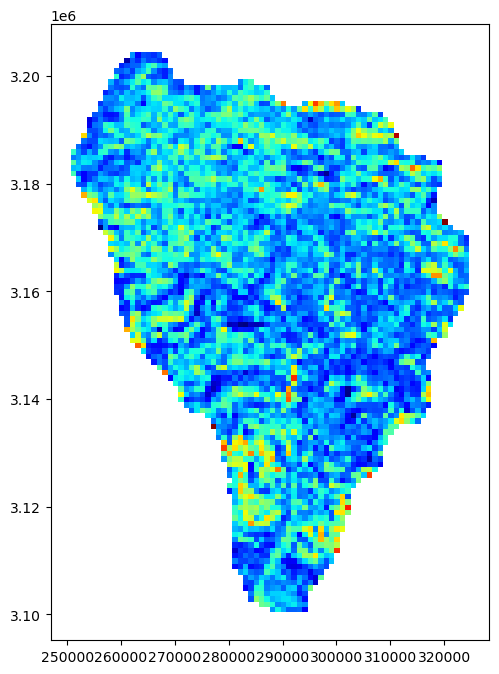

In [110]:
cell.plot(column='T', cmap='jet', figsize=(12, 8))

In [73]:
cell.loc[cell['index'] == df.index.values]

ValueError: ('Lengths must match to compare', (7875,), (4471,))

In [51]:
prop.loc[prop['index_right'] == 186, 'T_scaled'].sum()

-6.712307692307693

In [52]:
prop_multi = prop.set_index(['index_right', 'cn']).copy()

In [27]:
prop_multi

NameError: name 'prop_multi' is not defined

In [53]:
prop_ds = prop_multi.to_xarray()

In [54]:
prop_ds = prop_ds.expand_dims(dim = {'t': ds.t.values})

In [55]:
prop_ds

<xarray.Dataset>
Dimensions:      (t: 149016, index_right: 4471, cn: 200)
Coordinates:
  * t            (t) int64 0 1 2 3 4 5 ... 149011 149012 149013 149014 149015
  * index_right  (index_right) float64 186.0 187.0 188.0 ... 7.838e+03 7.839e+03
  * cn           (cn) int64 0 1 2 3 4 5 6 7 ... 192 193 194 195 196 197 198 199
Data variables:
    geometry     (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    n            (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    sum          (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    prop         (t, index_right, cn) float64 nan nan nan nan ... nan nan nan

In [31]:
T = ds.T.sel(clusters = prop_ds.cn-1) * 0.01

In [32]:
T = T.expand_dims(dim = {'index_right': prop_ds.index_right.values})

In [33]:
prop_ds['T'] = T

In [34]:
prop_ds = prop_ds.transpose('t', 'index_right', 'cn')

In [35]:
prop_ds['T_scaled'] = prop_ds['T'] * prop_ds['prop'].sel(t=0)

In [36]:
temp_ds = prop_ds.T_scaled.groupby('index_right').sum('cn')

In [1]:
temp_ds

NameError: name 'temp_ds' is not defined

In [37]:
temp_ds.sel(t=0).plot()

: 

: 

In [40]:
prop_ds.groupby('index_right').T_scaled.sum(dim = 'cn')

AttributeError: 'DatasetGroupBy' object has no attribute 'T_scaled'

In [39]:
prop_ds.isel(t=0, index_right = 0).T_scaled.values

: 

: 

In [ ]:
prop = prop_ds.prop.groupby('index_right')
T = prop_ds.T.groupby('index_right')

: 

: 

In [35]:
prop_ds['T_scaled'] = prop_ds['T'] * prop_ds['prop'].sel(t=0).values

ValueError: operands could not be broadcast together with shapes (4471, 149016, 200) (4471, 200)

In [ ]:
prop_ds.sel.(t=0).T_scaled

: 

: 

In [35]:
prop_ds = prop_ds.transpose('t', 'index_right', 'cn')

In [94]:
# make T_scaled variable that has the same dimensions as a prop_ds 
T_scaled = T * prop_ds.prop

: 

: 

In [92]:
T_scaled = T * prop_ds.prop.sel(t=0, ).values

ValueError: operands could not be broadcast together with shapes (149016, 200) (4471, 200)

In [81]:
prop_ds

<xarray.Dataset>
Dimensions:      (t: 149016, index_right: 4471, cn: 200)
Coordinates:
  * t            (t) int64 0 1 2 3 4 5 ... 149011 149012 149013 149014 149015
  * index_right  (index_right) float64 186.0 187.0 188.0 ... 7.838e+03 7.839e+03
  * cn           (cn) int64 1 2 3 4 5 6 7 8 ... 193 194 195 196 197 198 199 200
Data variables:
    geometry     (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    n            (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    sum          (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    prop         (t, index_right, cn) float64 nan nan nan nan ... nan nan nan

In [91]:
prop_ds.prop.sel(t=0, index_right=190)

<xarray.DataArray 'prop' (cn: 200)>
array([       nan,        nan,        nan,        nan, 0.01886792,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.11320755,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.05660377,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.71698113,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.0754717 ,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.01886792,        nan,        nan,        nan])
Coordinates:
    t            int64 0
    index_right  float64 190.0
  * cn           (cn) int64 1 2 3 4 5 6 7 8 ... 193 194 195 196 197 198 199 200

In [80]:
T_scaled = T * prop_ds.prop.sel(t=0).values

ValueError: operands could not be broadcast together with shapes (149016, 200) (4471, 200)

In [78]:
prop_ds

<xarray.Dataset>
Dimensions:      (t: 149016, index_right: 4471, cn: 200)
Coordinates:
  * t            (t) int64 0 1 2 3 4 5 ... 149011 149012 149013 149014 149015
  * index_right  (index_right) float64 186.0 187.0 188.0 ... 7.838e+03 7.839e+03
  * cn           (cn) int64 1 2 3 4 5 6 7 8 ... 193 194 195 196 197 198 199 200
Data variables:
    geometry     (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    n            (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    sum          (t, index_right, cn) float64 nan nan nan nan ... nan nan nan
    prop         (t, index_right, cn) float64 nan nan nan nan ... nan nan nan

In [77]:
prop_ds.sel(t=0, index_right = 186).prop

<xarray.DataArray 'prop' (cn: 200)>
array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.23076923,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.76923077,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])
Coordinates:
    t            int64 0
    index_right  float64 186.0
  * cn           (cn) int64 1 2 3 4 5 6 7 8 ... 193 194 195 196 197 198 199 200

In [74]:
prop_ds.sel('index_right' = 186)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3997771001.py, line 1)

In [67]:
prop_ds.sel(cn = 1)

<xarray.Dataset>
Dimensions:      (t: 149016, index_right: 4471)
Coordinates:
  * t            (t) int64 0 1 2 3 4 5 ... 149011 149012 149013 149014 149015
  * index_right  (index_right) float64 186.0 187.0 188.0 ... 7.838e+03 7.839e+03
    cn           int64 1
Data variables:
    geometry     (t, index_right) float64 nan nan nan nan ... nan nan nan nan
    n            (t, index_right) float64 nan nan nan nan ... nan nan nan nan
    sum          (t, index_right) float64 nan nan nan nan ... nan nan nan nan
    prop         (t, index_right) float64 nan nan nan nan ... nan nan nan nan

In [64]:
cn = prop_ds.sel(t=0).cn.values

In [65]:
T = ds.T.sel(clusters = cn-1) * 0.01

In [66]:
T_scaled = T * prop_ds.prop.sel(t=0).values

ValueError: operands could not be broadcast together with shapes (149016, 200) (4471, 200)

In [34]:
T_scaled = T_scaled.rename({'clusters': 'index'})

In [35]:
prop_ds.assign(T_scaled = T_scaled)

<xarray.Dataset>
Dimensions:      (index: 65862, t: 149016)
Coordinates:
  * index        (index) int64 0 1 2 3 4 5 ... 65857 65858 65859 65860 65861
  * t            (t) int64 0 1 2 3 4 5 ... 149011 149012 149013 149014 149015
Data variables:
    index_right  (t, index) float64 186.0 186.0 187.0 ... 7.839e+03 7.839e+03
    cn           (t, index) int64 34 104 15 34 35 55 ... 89 111 134 136 153 172
    geometry     (t, index) int64 3 10 5 63 4 5 3 1 14 2 ... 1 5 10 6 1 1 10 3 1
    n            (t, index) int64 3 10 5 63 4 5 3 1 14 2 ... 1 5 10 6 1 1 10 3 1
    sum          (t, index) float64 13.0 13.0 99.0 99.0 ... 41.0 41.0 41.0 41.0
    prop         (t, index) float64 0.2308 0.7692 0.05051 ... 0.07317 0.02439
    T_scaled     (t, index) float64 dask.array<chunksize=(149016, 65862), meta=np.ndarray>

In [ ]:
prop_ds['index_right'] 

: 

: 

NameError: name 'prop_ds' is not defined

In [39]:
prop_ds.groupby('index_right').T_scaled.sum()

: 

: 

In [344]:
# Make a temperature variable in prop_ds where the temperature is equal to the temperature of the cluster multiplied by the proportion of the cell that is in that cluster for each time step
temp_da = xr.DataArray(np.zeros((len(ds.t.values), len(prop_ds.index_right.values))), dims = ['t', 'index_right'])
# prop_ds.cn indicates the cluster number
# ds.T indicates the temperature of the cluster at each time step
# make a temperature variable that has the dimensions (t,index_right)
T_da = ds.T * prop_ds.cn


: 

: 

In [313]:
prop_copy['T'] = np.nan

In [324]:
prop_copy

,index_right,cn,geometry,n,sum,prop,T,T_scaled
0,186.0,34,3,3,13.0,0.230769,-18.24,-4.209231
1,186.0,104,10,10,13.0,0.769231,-16.58,-12.753846
2,187.0,15,5,5,99.0,0.050505,-15.63,-0.789394
3,187.0,34,63,63,99.0,0.636364,-18.24,-11.607273
4,187.0,35,4,4,99.0,0.040404,-17.67,-0.713939
...,...,...,...,...,...,...,...,...
65857,7839.0,111,1,1,41.0,0.024390,-15.37,-0.374878
65858,7839.0,134,1,1,41.0,0.024390,-14.15,-0.345122
65859,7839.0,136,10,10,41.0,0.243902,-15.61,-3.807317
65860,7839.0,153,3,3,41.0,0.073171,-16.62,-1.216098


In [315]:
for i in range(len(ds.clusters)):
    prop_copy.loc[prop_copy['cn'] == i+1, 'T'] = ds.sel(t=0, clusters = i).T.values * 0.01

In [317]:
prop_copy['T_scaled'] = prop_copy['T'] * prop_copy['prop']

In [322]:
df = pd.DataFrame()
df['index_right'] = prop_copy['index_right'].unique().copy()
df['T'] = np.nan
for i, val in enumerate(prop_copy['index_right'].unique()):
    df.loc[df['index_right'] == val, 'T'] = prop_copy.loc[prop_copy['index_right'] == val, 'T_scaled'].sum()

In [323]:
df

,index_right,T
0,186.0,-16.963077
1,187.0,-17.496667
2,188.0,-17.052797
3,189.0,-18.166667
4,190.0,-16.319623
...,...,...
4466,7835.0,-15.827143
4467,7836.0,-16.620794
4468,7837.0,-15.961061
4469,7838.0,-16.665763


In [308]:
for i in prop_copy['index_right'].unique():
    prop_copy.loc[prop_copy['index_right'] == i, 'T'] = prop_copy.loc[prop_copy['index_right'] == i, 'T'] * prop_copy.loc[prop_copy['index_right'] == i, 'prop']

In [312]:
prop_copy

,index_right,cn,geometry,n,sum,prop,T
0,186.0,34,3,3,13.0,0.230769,-4.209231
1,186.0,104,10,10,13.0,0.769231,-12.753846
2,187.0,15,5,5,99.0,0.050505,-0.789394
3,187.0,34,63,63,99.0,0.636364,-11.607273
4,187.0,35,4,4,99.0,0.040404,-0.713939
...,...,...,...,...,...,...,...
65857,7839.0,111,1,1,41.0,0.024390,-0.374878
65858,7839.0,134,1,1,41.0,0.024390,-0.345122
65859,7839.0,136,10,10,41.0,0.243902,-3.807317
65860,7839.0,153,3,3,41.0,0.073171,-1.216098


In [296]:
prop_copy

,index_right,cn,geometry,n,sum,prop,T
0,186.0,34,3,3,13.0,0.230769,NaN
1,186.0,104,10,10,13.0,0.769231,NaN
2,187.0,15,5,5,99.0,0.050505,NaN
3,187.0,34,63,63,99.0,0.636364,NaN
4,187.0,35,4,4,99.0,0.040404,NaN
...,...,...,...,...,...,...,...
65857,7839.0,111,1,1,41.0,0.024390,NaN
65858,7839.0,134,1,1,41.0,0.024390,NaN
65859,7839.0,136,10,10,41.0,0.243902,NaN
65860,7839.0,153,3,3,41.0,0.073171,NaN


In [256]:
count.groupby(level = [1,0]).sum()

geometry   n
cn    index_right              
1.0   807.0               2   2
      808.0               5   5
      820.0               1   1
      912.0               2   2
      913.0               6   6
...                     ...  ..
200.0 7729.0              1   1
      7731.0              5   5
      7732.0             11  11
      7834.0              2   2
      7835.0              3   3

[65862 rows x 2 columns]

In [244]:
count.index[]

MultiIndex([( 186.0,  34.0),
            ( 186.0, 104.0),
            ( 187.0,  15.0),
            ( 187.0,  34.0),
            ( 187.0,  35.0),
            ( 187.0,  55.0),
            ( 187.0,  65.0),
            ( 187.0,  92.0),
            ( 187.0, 104.0),
            ( 187.0, 110.0),
            ...
            (7839.0,  11.0),
            (7839.0,  12.0),
            (7839.0,  24.0),
            (7839.0,  28.0),
            (7839.0,  89.0),
            (7839.0, 111.0),
            (7839.0, 134.0),
            (7839.0, 136.0),
            (7839.0, 153.0),
            (7839.0, 172.0)],
           names=['index_right', 'cn'], length=65862)

In [240]:
count.groupby('index_right').sum()

,geometry,n
index_right,,
186.0,13,13
187.0,99,99
188.0,143,143
189.0,132,132
190.0,53,53
...,...,...
7835.0,98,98
7836.0,126,126
7837.0,132,132


In [225]:
count[]
for i in range(len(count)):
    count['cn']count.index[i][1])

34.0
104.0
15.0
34.0
35.0
55.0
65.0
92.0
104.0
110.0
194.0
5.0
10.0
15.0
29.0
34.0
35.0
65.0
68.0
92.0
104.0
110.0
159.0
166.0
192.0
194.0
197.0
5.0
15.0
35.0
44.0
54.0
59.0
68.0
75.0
104.0
142.0
145.0
158.0
159.0
166.0
167.0
192.0
197.0
5.0
29.0
55.0
104.0
159.0
197.0
15.0
35.0
110.0
166.0
194.0
15.0
34.0
35.0
65.0
75.0
92.0
110.0
145.0
166.0
34.0
35.0
104.0
166.0
5.0
15.0
34.0
35.0
68.0
104.0
110.0
159.0
194.0
5.0
29.0
34.0
35.0
44.0
59.0
68.0
104.0
110.0
145.0
158.0
159.0
192.0
197.0
5.0
29.0
34.0
35.0
44.0
53.0
54.0
59.0
75.0
104.0
130.0
158.0
159.0
192.0
194.0
197.0
35.0
37.0
44.0
54.0
55.0
75.0
104.0
145.0
158.0
166.0
55.0
104.0
15.0
92.0
110.0
5.0
15.0
35.0
54.0
68.0
75.0
110.0
113.0
135.0
159.0
167.0
194.0
15.0
35.0
44.0
54.0
59.0
75.0
110.0
145.0
166.0
194.0
5.0
34.0
35.0
37.0
44.0
55.0
59.0
75.0
110.0
142.0
145.0
158.0
166.0
197.0
35.0
75.0
110.0
145.0
166.0
5.0
29.0
34.0
35.0
55.0
75.0
104.0
110.0
145.0
158.0
159.0
166.0
197.0
29.0
55.0
104.0
158.0
165.0
197.0
5.0
29.0
34.0


In [219]:
count

geometry
index_right cn             
186.0       34.0          3
            104.0        10
187.0       15.0          5
            34.0         63
            35.0          4
...                     ...
7839.0      111.0         1
            134.0         1
            136.0        10
            153.0         3
            172.0         1

[65862 rows x 1 columns]

In [224]:
count.index[:][1]

(186.0, 104.0)

In [221]:
count['cn'] = count.index[:][1]

ValueError: Length of values (2) does not match length of index (65862)

In [208]:
dissolve

,geometry,cn
index_right,,
186.0,"MULTIPOINT (251342.909 3182300.210, 251422.343...",13
187.0,"MULTIPOINT (250709.462 3183145.507, 250711.443...",99
188.0,"MULTIPOINT (250634.004 3183424.371, 250635.986...",143
189.0,"MULTIPOINT (250655.808 3184440.468, 250657.790...",132
190.0,"MULTIPOINT (250677.618 3185456.567, 250759.006...",53
...,...,...
7835.0,"MULTIPOINT (323633.840 3165461.331, 323635.232...",98
7836.0,"MULTIPOINT (323647.765 3166384.789, 323649.157...",126
7837.0,"MULTIPOINT (323663.086 3167400.594, 323664.479...",132


In [179]:
len(x_grid)

75

In [180]:
len(y_grid)

105

In [178]:
np.shape(y_mesh)

(105, 75)

In [177]:
np.shape(x_mesh)

(105, 75)

In [170]:
xd = np.where(np.abs(df['x'][0] - x_grid) == np.min(np.abs(df['x'][0] - x_grid)))[0]

In [171]:
x_grid[xd]

array([251132.02200466])

In [162]:
x_grid

array([250132.02200466, 251132.02200466, 252132.02200466, 253132.02200466,
       254132.02200466, 255132.02200466, 256132.02200466, 257132.02200466,
       258132.02200466, 259132.02200466, 260132.02200466, 261132.02200466,
       262132.02200466, 263132.02200466, 264132.02200466, 265132.02200466,
       266132.02200466, 267132.02200466, 268132.02200466, 269132.02200466,
       270132.02200466, 271132.02200466, 272132.02200466, 273132.02200466,
       274132.02200466, 275132.02200466, 276132.02200466, 277132.02200466,
       278132.02200466, 279132.02200466, 280132.02200466, 281132.02200466,
       282132.02200466, 283132.02200466, 284132.02200466, 285132.02200466,
       286132.02200466, 287132.02200466, 288132.02200466, 289132.02200466,
       290132.02200466, 291132.02200466, 292132.02200466, 293132.02200466,
       294132.02200466, 295132.02200466, 296132.02200466, 297132.02200466,
       298132.02200466, 299132.02200466, 300132.02200466, 301132.02200466,
       302132.02200466, 3

In [158]:
df

,lonc,latc,cn,x,y
0,84.446250,28.772500,104.0,250677.618451,3.185457e+06
1,84.446250,28.771667,104.0,250675.635417,3.185364e+06
2,84.446250,28.770833,104.0,250673.652435,3.185272e+06
3,84.446250,28.770000,104.0,250671.669507,3.185179e+06
4,84.446250,28.769167,44.0,250669.686631,3.185087e+06
...,...,...,...,...,...
571607,85.205417,28.618333,89.0,324553.847873,3.167018e+06
571608,85.205417,28.617500,60.0,324552.462054,3.166925e+06
571609,85.205417,28.616667,43.0,324551.076273,3.166833e+06
571610,85.205417,28.615833,43.0,324549.690529,3.166741e+06


In [156]:
df.gr

,lonc,latc,cn
0,84.446250,28.772500,104.0
1,84.446250,28.771667,104.0
2,84.446250,28.770833,104.0
3,84.446250,28.770000,104.0
4,84.446250,28.769167,44.0
...,...,...,...
571607,85.205417,28.618333,89.0
571608,85.205417,28.617500,60.0
571609,85.205417,28.616667,43.0
571610,85.205417,28.615833,43.0


In [7]:
ds

<xarray.Dataset>
Dimensions:  (t: 149016, clusters: 200, pixels: 571612, latitude: 1560,
              longitude: 1380)
Dimensions without coordinates: t, clusters, pixels, latitude, longitude
Data variables: (12/15)
    T        (t, clusters) int16 dask.array<chunksize=(149016, 200), meta=np.ndarray>
    U        (t, clusters) uint16 dask.array<chunksize=(149016, 200), meta=np.ndarray>
    q        (t, clusters) uint16 dask.array<chunksize=(149016, 200), meta=np.ndarray>
    LW       (t, clusters) uint16 dask.array<chunksize=(149016, 200), meta=np.ndarray>
    SW       (t, clusters) uint16 dask.array<chunksize=(149016, 200), meta=np.ndarray>
    P        (t, clusters) uint16 dask.array<chunksize=(149016, 200), meta=np.ndarray>
    ...       ...
    latp     (pixels) float64 dask.array<chunksize=(571612,), meta=np.ndarray>
    lonp     (pixels) float64 dask.array<chunksize=(571612,), meta=np.ndarray>
    cn       (pixels) float64 dask.array<chunksize=(571612,), meta=np.ndarray>
    latg     (latitude) float64 dask.array<chunksize=(1560,), meta=np.ndarray>
    long     (longitude) float64 dask.array<chunksize=(1380,), meta=np.ndarray>
    mask     (longitude, latitude) uint8 dask.array<chunksize=(1380, 1560), meta=np.ndarray>
Attributes:
    name:              TopoSCALE_BG.nc
    contains:          Hourly "TopoSCALEd" ERA5 forcing at 90 m resolution fo...
    created by:        Kristoffer Aalstad
    created:           05-Jan-2023 21:35:51
    timestamps:        The dataare hourly starting on the 01.01.1999 00:00 UT...
    origin:            The data was TopoSCALed in Matlab using the TopoLAB to...
    acknowledgements:  Thanks to C3S & ECMWF for providing the ERA5 reanalysi...
    citation:          See Fiddes et al. (2022, https://doi.org/10.5194/gmd-1...
    contact:           kristoffer.aalstad@geo.uio.no for more information and...

In [99]:
ds.isel(t= 0, clusters = 1).T

<xarray.DataArray 'T' ()>
dask.array<getitem, shape=(), dtype=int16, chunksize=(), chunktype=numpy.ndarray>
Attributes:
    long_name:  2 m air temperature [deg C]. Scale factor = 0.01

In [98]:
ds.sel(t = 0, clusters = 1)

<xarray.Dataset>
Dimensions:  (pixels: 571612, latitude: 1560, longitude: 1380)
Dimensions without coordinates: pixels, latitude, longitude
Data variables: (12/15)
    T        int16 dask.array<chunksize=(), meta=np.ndarray>
    U        uint16 dask.array<chunksize=(), meta=np.ndarray>
    q        uint16 dask.array<chunksize=(), meta=np.ndarray>
    LW       uint16 dask.array<chunksize=(), meta=np.ndarray>
    SW       uint16 dask.array<chunksize=(), meta=np.ndarray>
    P        uint16 dask.array<chunksize=(), meta=np.ndarray>
    ...       ...
    latp     (pixels) float64 dask.array<chunksize=(571612,), meta=np.ndarray>
    lonp     (pixels) float64 dask.array<chunksize=(571612,), meta=np.ndarray>
    cn       (pixels) float64 dask.array<chunksize=(571612,), meta=np.ndarray>
    latg     (latitude) float64 dask.array<chunksize=(1560,), meta=np.ndarray>
    long     (longitude) float64 dask.array<chunksize=(1380,), meta=np.ndarray>
    mask     (longitude, latitude) uint8 dask.array<chunksize=(1380, 1560), meta=np.ndarray>
Attributes:
    name:              TopoSCALE_BG.nc
    contains:          Hourly "TopoSCALEd" ERA5 forcing at 90 m resolution fo...
    created by:        Kristoffer Aalstad
    created:           05-Jan-2023 21:35:51
    timestamps:        The dataare hourly starting on the 01.01.1999 00:00 UT...
    origin:            The data was TopoSCALed in Matlab using the TopoLAB to...
    acknowledgements:  Thanks to C3S & ECMWF for providing the ERA5 reanalysi...
    citation:          See Fiddes et al. (2022, https://doi.org/10.5194/gmd-1...
    contact:           kristoffer.aalstad@geo.uio.no for more information and...

In [104]:
ds.cn.values

array([104., 104., 104., ...,  43.,  43., 133.])

In [106]:
ds_copy = ds.copy()

In [110]:
cl1_t = ds.sel(t = 0, clusters = 1).T

In [112]:
cl1_t = ds.cn[ds.cn == 1]

In [115]:
len(ds.t) /12

12418.0

In [137]:
ds

<xarray.Dataset>
Dimensions:  (t: 149016, clusters: 200, pixels: 571612, latitude: 1560,
              longitude: 1380)
Dimensions without coordinates: t, clusters, pixels, latitude, longitude
Data variables: (12/15)
    T        (t, clusters) int16 dask.array<chunksize=(149016, 200), meta=np.ndarray>
    U        (t, clusters) uint16 dask.array<chunksize=(149016, 200), meta=np.ndarray>
    q        (t, clusters) uint16 dask.array<chunksize=(149016, 200), meta=np.ndarray>
    LW       (t, clusters) uint16 dask.array<chunksize=(149016, 200), meta=np.ndarray>
    SW       (t, clusters) uint16 dask.array<chunksize=(149016, 200), meta=np.ndarray>
    P        (t, clusters) uint16 dask.array<chunksize=(149016, 200), meta=np.ndarray>
    ...       ...
    latp     (pixels) float64 dask.array<chunksize=(571612,), meta=np.ndarray>
    lonp     (pixels) float64 dask.array<chunksize=(571612,), meta=np.ndarray>
    cn       (pixels) float64 dask.array<chunksize=(571612,), meta=np.ndarray>
    latg     (latitude) float64 dask.array<chunksize=(1560,), meta=np.ndarray>
    long     (longitude) float64 dask.array<chunksize=(1380,), meta=np.ndarray>
    mask     (longitude, latitude) uint8 dask.array<chunksize=(1380, 1560), meta=np.ndarray>
Attributes:
    name:              TopoSCALE_BG.nc
    contains:          Hourly "TopoSCALEd" ERA5 forcing at 90 m resolution fo...
    created by:        Kristoffer Aalstad
    created:           05-Jan-2023 21:35:51
    timestamps:        The dataare hourly starting on the 01.01.1999 00:00 UT...
    origin:            The data was TopoSCALed in Matlab using the TopoLAB to...
    acknowledgements:  Thanks to C3S & ECMWF for providing the ERA5 reanalysi...
    citation:          See Fiddes et al. (2022, https://doi.org/10.5194/gmd-1...
    contact:           kristoffer.aalstad@geo.uio.no for more information and...

In [140]:
ds.T

<xarray.DataArray 'T' (t: 149016, clusters: 200)>
dask.array<open_dataset-f2a6a01774d283cf92a953029f377077T, shape=(149016, 200), dtype=int16, chunksize=(149016, 200), chunktype=numpy.ndarray>
Dimensions without coordinates: t, clusters
Attributes:
    long_name:  2 m air temperature [deg C]. Scale factor = 0.01

In [142]:
clusters = ds.clusters.values

In [145]:
cn_temp = np.empty(len(ds.cn.values))

In [ ]:
# write a function for 

In [ ]:
# In the ds dataset, make a new variable called temp where the values of ds.cn are replaced 
# by the temperature values of ds.T for each cluster for all times

def ds_temp()



In [147]:
cn_temp[cn_temp == ds.sel(t=0, clusters ==).T]

/var/folders/07/3pj74xcs7mqdgyzchd88y9840000gn/T/ipykernel_55243/2303311132.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  cn_temp[cn_temp == ds.sel(t=0).T]


ValueError: operands could not be broadcast together with shapes (200,) (571612,)

In [ ]:
ds_copy = ds.copy()
ds.T[:,]

In [ ]:
ds.sel(t=0).groupby()

In [136]:
ds.T

<xarray.DataArray 'T' (t: 149016, clusters: 200)>
dask.array<open_dataset-f2a6a01774d283cf92a953029f377077T, shape=(149016, 200), dtype=int16, chunksize=(149016, 200), chunktype=numpy.ndarray>
Dimensions without coordinates: t, clusters
Attributes:
    long_name:  2 m air temperature [deg C]. Scale factor = 0.01

In [128]:
t = xr.DataArray(ds.t.values, dims = 't')
T = xr.DataArray(ds.T.values, dims = ('t', 'clusters'))
cn = xr.DataArray(ds.cn.values, dims = ('t', 'lonp', 'latp'))

In [134]:
t2, T2, cn2 = xr.broadcast([t, T, cn])

TypeError: list.copy() takes no keyword arguments

In [132]:
b2

<xarray.DataArray (pixels: 571612, clusters: 200)>
array([[-2042, -1418,   798, ..., -1591, -1449, -2002],
       [-2042, -1418,   798, ..., -1591, -1449, -2002],
       [-2042, -1418,   798, ..., -1591, -1449, -2002],
       ...,
       [-2042, -1418,   798, ..., -1591, -1449, -2002],
       [-2042, -1418,   798, ..., -1591, -1449, -2002],
       [-2042, -1418,   798, ..., -1591, -1449, -2002]], dtype=int16)
Dimensions without coordinates: pixels, clusters

In [119]:
cluster_temp = dict()
for i, time in enumerate(ds.sel(t = slice(0, 12418))):
    for j, cluster in enumerate(ds.clusters):
        ds.cn[ds.cn == cluster] = ds.sel(t=i, clusters = cluster).T 
    cluster_temp[time] = ds.cn
    

KeyboardInterrupt: 

In [117]:
ds.cn[ds.cn == 1] = ds.sel(t=0, clusters = 1).T 

In [108]:
for i in range(len(ds.t.values)):
    for j in range(len(ds.clusters.values)):
        ds.cn[ds.cn == j] = ds.sel(t=i, clusters = j).T

KeyboardInterrupt: 

In [102]:
len(np.repeat(ds.sel(t =0).T.values, len(ds.lonp.values)))

114322400

In [ ]:
new_ds = xr.Dataset({'T': (('t', 'lonp', 'latp'), )})

In [4]:
T = ds.T.values
cn = ds.cn.values.astype('int')
t = ds.t.values
pixels = ds.pixels.values

In [6]:
T[0]

array([-2042, -1418,   798, -1039, -1619,  1304, -1889, -1209,  -732,
       -1836, -1420, -1480,   292,   511, -1563, -1437, -1363, -2033,
        1417, -1273,   726,  -929, -2190, -2142, -1419,  1104, -1605,
       -1505, -1577,  1261, -2289,   380, -1402, -1824, -1767, -1836,
       -1813,  -292,  1299,     7,  -483,  1268, -1637, -2141, -1586,
       -1775,  -546,  1166,  -101, -1599,  -384,   523, -2220, -1477,
       -1543,  -467,   -57, -1640, -2093, -1939,   751, -1896,   597,
         911, -1721, -1647, -1538, -2143,   765,  -222, -1964, -1944,
       -1446, -1623, -1704, -1493, -1374,  -623, -2228,  -705, -1832,
         700, -1825, -1374, -2080,     3, -1429, -1697, -1731, -1613,
         623, -1380, -1518, -1500, -1844,  -193, -1817, -1793,  -742,
         114, -1736,  1246,  -452, -1658, -1702,   790, -1252, -1665,
          -4, -1498, -1537,  -521, -1838, -1767, -1992,    17,  -550,
        -417,   -47, -1705,  -681,  -966, -1669,     2, -1656, -1519,
       -1702,  -977,

In [57]:
t

array([     0,      1,      2, ..., 149013, 149014, 149015])

In [58]:
a = (t,pixels)

In [61]:
np.shape(a)

/Users/jacobqs/opt/miniconda3/envs/geohyd/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(2,)

In [63]:
empty_temp = np.empty((len(t),len(pixels)))

In [73]:
ds.T.isel(clusters= 0, t = 0).values

array(-2042, dtype=int16)

In [75]:
temp_dict = dict()
for time, time_val in enumerate(ds.t.values):
    for i, val in enumerate(cn):
        empty_temp[time, i] = ds.sel(t=time_val, clusters = val).T.values
        

KeyboardInterrupt: 

In [ ]:
np.empty()

In [36]:
temp = xr.DataArray(ds.T.values,
                    dims = ['t', 'lonp', 'latp'],
                    coords= {'t': ds.t.values, 'lonp': ds.lonp.values, 'latp': ds.latp.values},
                    )

ValueError: different number of dimensions on data and dims: 2 vs 3

In [9]:
df_pixels = pd.DataFrame()
df_pixels['cn'] = ds.cn
df_pixels['lonp'] = ds.lonp
df_pixels['latp'] = ds.latp

In [10]:
ds_one_hour = ds.isel(t = 0)
temp = ds_one_hour.T.values
temp_indx = np.arange(200)

In [11]:
df_pixels['temp'] = np.nan
for i in range(1,201):
    df_pixels.loc[df_pixels.cn==i, 'temp'] = temp[i-1]
    

In [12]:
lonp = df_pixels.lonp.values
latp = df_pixels.latp.values

## Making a pyproj object for UTM Zone 45N

crs_4326 = CRS.from_epsg(4326) # Lat-lon
crs_32645 = CRS.from_epsg(32645) # CRS 

## Create transformer to convert from CRS to CRS

transformer = Transformer.from_crs(crs_4326, crs_32645, always_xy = True)

x, y = transformer.transform(lonp, latp)

In [13]:
df_pixels['x'] = x
df_pixels['y'] = y

In [14]:
# Extracting only data within the area of interest
x_min_mask = ds.long.min().values
x_max_mask = ds.long.max().values
y_min_mask = ds.latg.min().values
y_max_mask = ds.latg.max().values

In [15]:
df_pixels = df_pixels.loc[(df_pixels.lonp < x_max_mask) & (df_pixels.lonp > x_min_mask) & (df_pixels.latp < y_max_mask) & (df_pixels.latp > y_min_mask)]

In [67]:
x_min = df_pixels.x.min()
x_max = df_pixels.x.max()
y_min = df_pixels.y.min()
y_max = df_pixels.y.max()
print(x_min, x_max, y_min, y_max)

250632.0220046622 324580.1854647944 3100375.356029151 3203499.957562465


In [72]:
x_min_grid = x_min - 500
x_max_grid = x_max + 500
y_min_grid = y_min - 500
y_max_grid = y_max + 500
print(x_min_grid, x_max_grid, y_min_grid, y_max_grid)

250132.0220046622 325080.1854647944 3099875.356029151 3203999.957562465


In [87]:
x_grid = np.arange(x_min_grid, x_max_grid, 1000)
y_grid = np.arange(y_min_grid, y_max_grid, 1000)

In [88]:
df_pixels['x_grid'] = np.nan
df_pixels['y_grid'] = np.nan

In [89]:
for i, val in enumerate(df_pixels['x']):
    x_dist = np.abs(df_pixels['x'][i] - x_grid)
    x_min_dist_inx = np.where(x_dist == x_dist.min())
    df_pixels.loc[i, 'x_grid'] = x_grid[x_min_dist_inx]
    y_dist = np.abs(df_pixels['y'][i] - y_grid)
    y_min_dist_inx = np.where(y_dist == y_dist.min())
    df_pixels.loc[i, 'y_grid'] = y_grid[y_min_dist_inx]

ValueError: Must have equal len keys and value when setting with an iterable

In [90]:
df_pixels

,cn,lonp,latp,temp,x,y,x_grid,y_grid
0,104.0,84.446250,28.772500,-1658.0,250677.618451,3.185457e+06,251132.022005,3.185875e+06
1,104.0,84.446250,28.771667,-1658.0,250675.635417,3.185364e+06,251132.022005,3.184875e+06
2,104.0,84.446250,28.770833,-1658.0,250673.652435,3.185272e+06,251132.022005,3.184875e+06
3,104.0,84.446250,28.770000,-1658.0,250671.669507,3.185179e+06,251132.022005,3.184875e+06
4,44.0,84.446250,28.769167,-2141.0,250669.686631,3.185087e+06,251132.022005,3.184875e+06
...,...,...,...,...,...,...,...,...
571607,89.0,85.205417,28.618333,-1731.0,324553.847873,3.167018e+06,NaN,NaN
571608,60.0,85.205417,28.617500,-1939.0,324552.462054,3.166925e+06,NaN,NaN
571609,43.0,85.205417,28.616667,-1637.0,324551.076273,3.166833e+06,NaN,NaN
571610,43.0,85.205417,28.615833,-1637.0,324549.690529,3.166741e+06,NaN,NaN


In [46]:
grouped_series = df_pixels.groupby(['x_grid', 'y_grid', 'cn']).size()

In [64]:
df_pixels

,cn,lonp,latp,temp,x,y,x_grid,y_grid
0,104.0,84.446250,28.772500,-1658.0,250677.618451,3.185457e+06,250650.022005,3.185467e+06
1,104.0,84.446250,28.771667,-1658.0,250675.635417,3.185364e+06,250650.022005,3.185363e+06
2,104.0,84.446250,28.770833,-1658.0,250673.652435,3.185272e+06,250650.022005,3.185259e+06
3,104.0,84.446250,28.770000,-1658.0,250671.669507,3.185179e+06,250650.022005,3.185155e+06
4,44.0,84.446250,28.769167,-2141.0,250669.686631,3.185087e+06,250650.022005,3.185051e+06
...,...,...,...,...,...,...,...,...
571607,89.0,85.205417,28.618333,-1731.0,324553.847873,3.167018e+06,324576.022005,3.167059e+06
571608,60.0,85.205417,28.617500,-1939.0,324552.462054,3.166925e+06,324576.022005,3.166955e+06
571609,43.0,85.205417,28.616667,-1637.0,324551.076273,3.166833e+06,324576.022005,3.166851e+06
571610,43.0,85.205417,28.615833,-1637.0,324549.690529,3.166741e+06,324576.022005,3.166747e+06


In [63]:
grouped_series

x_grid         y_grid        cn   
250650.022005  3.183283e+06  34.0     1
               3.183387e+06  34.0     1
               3.183491e+06  104.0    1
               3.183595e+06  104.0    1
               3.183699e+06  34.0     1
                                     ..
324576.022005  3.168411e+06  138.0    1
               3.168515e+06  157.0    1
               3.168619e+06  111.0    1
               3.168723e+06  89.0     1
                             153.0    1
Length: 540657, dtype: int64

In [156]:
df_pixels['grid_id'] = np.nan
for i, v in enumerate(df_pixels['x_grid']):
    count = 0
    x_list = []
    y_list = []
    if i == 0:
        x = df_pixels['x_grid'][i]
        y = df_pixels['y_grid'][i]
        df_pixels.loc[i, 'grid_id'] = count
        x_list.append(x)
        y_list.append(y)
    else:
        x = df_pixels['x_grid'][i]
        y = df_pixels['y_grid'][i]
        if (x == x_list[i-1] and y == y_list[i-1]):
            df_pixels.loc[i, 'grid_id'] = count
            count =+ 1
        else:
            count =+ 1
            df_pixels.loc[i, 'grid_id'] = count
        
        

IndexError: list index out of range

In [133]:
np.unique([df_pixels.x_grid, df_pixels.y_grid])

array([ 250650.02200466,  250724.02200466,  250798.02200466, ...,
       3203251.35602915, 3203355.35602915, 3203459.35602915])

In [129]:
df_pixels.groupby(['cn', 'x_grid', 'y_grid']).size()

cn     x_grid         y_grid      
1.0    256940.022005  3.173611e+06    1
       257014.022005  3.173611e+06    1
       257458.022005  3.173507e+06    1
                      3.186195e+06    1
       257532.022005  3.172987e+06    1
                                     ..
200.0  323688.022005  3.165291e+06    1
                      3.165707e+06    1
       323762.022005  3.165187e+06    1
       323910.022005  3.165499e+06    1
       323984.022005  3.165499e+06    1
Length: 540657, dtype: int64

In [110]:
x_dist = np.abs(df_pixels['x'][571611] - x_grid)

In [111]:
x_dist

array([74416.28281794, 74342.28281794, 74268.28281794, ...,
         323.71718206,   397.71718206,   471.71718206])

In [112]:
idx = np.where(x_dist == x_dist.min())

In [113]:
idx

(array([1006]),)

In [114]:
x_grid[idx]

array([324576.02200466])

In [102]:
df_pixels

,cn,lonp,latp,temp,x,y,x_grid,y_grid
0,104.0,84.446250,28.772500,-1658.0,250677.618451,3.185457e+06,250650.022005,3.185467e+06
1,104.0,84.446250,28.771667,-1658.0,250675.635417,3.185364e+06,250650.022005,3.185363e+06
2,104.0,84.446250,28.770833,-1658.0,250673.652435,3.185272e+06,250650.022005,3.185259e+06
3,104.0,84.446250,28.770000,-1658.0,250671.669507,3.185179e+06,250650.022005,3.185155e+06
4,44.0,84.446250,28.769167,-2141.0,250669.686631,3.185087e+06,250650.022005,3.185051e+06
...,...,...,...,...,...,...,...,...
571607,89.0,85.205417,28.618333,-1731.0,324553.847873,3.167018e+06,NaN,NaN
571608,60.0,85.205417,28.617500,-1939.0,324552.462054,3.166925e+06,NaN,NaN
571609,43.0,85.205417,28.616667,-1637.0,324551.076273,3.166833e+06,NaN,NaN
571610,43.0,85.205417,28.615833,-1637.0,324549.690529,3.166741e+06,NaN,NaN


In [88]:
x_dist0[7]

27.596446339855902

In [87]:
np.where(x_dist0 == x_dist0.min())

(array([7]),)

In [73]:
df_pixels['x'][0] 

250677.61845100205

In [70]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.spatial import cKDTree

In [71]:
x_tree = cKDTree(x_grid)
y_tree = cKDTree(y_grid)

ValueError: data must be 2 dimensions

In [69]:
closest_longs = x_grid[cdist(df_pixels['x'], x_grid).argmin(1)]
closest_lats = y_grid[cdist(df_pixels['y'], y_grid).argmin(1)]

ValueError: XA must be a 2-dimensional array.

In [51]:
df_pixels

,cn,lonp,latp,temp,x,y
0,104.0,84.446250,28.772500,-1658.0,250677.618451,3.185457e+06
1,104.0,84.446250,28.771667,-1658.0,250675.635417,3.185364e+06
2,104.0,84.446250,28.770833,-1658.0,250673.652435,3.185272e+06
3,104.0,84.446250,28.770000,-1658.0,250671.669507,3.185179e+06
4,44.0,84.446250,28.769167,-2141.0,250669.686631,3.185087e+06
...,...,...,...,...,...,...
571607,89.0,85.205417,28.618333,-1731.0,324553.847873,3.167018e+06
571608,60.0,85.205417,28.617500,-1939.0,324552.462054,3.166925e+06
571609,43.0,85.205417,28.616667,-1637.0,324551.076273,3.166833e+06
571610,43.0,85.205417,28.615833,-1637.0,324549.690529,3.166741e+06


In [50]:
len(x_grid)

1000

In [75]:
df_pixels

,cn,lonp,latp,temp
0,104.0,84.446250,28.772500,-1658.0
1,104.0,84.446250,28.771667,-1658.0
2,104.0,84.446250,28.770833,-1658.0
3,104.0,84.446250,28.770000,-1658.0
4,44.0,84.446250,28.769167,-2141.0
...,...,...,...,...
571607,89.0,85.205417,28.618333,-1731.0
571608,60.0,85.205417,28.617500,-1939.0
571609,43.0,85.205417,28.616667,-1637.0
571610,43.0,85.205417,28.615833,-1637.0


In [55]:
one_hour_df

T    U     q    LW  SW  P   ps       latc       lonc  clusters
t clusters                                                                   
0 0        -2042  168   457  1111   0  0  575  28.717500  84.724583         0
  1        -1418  181   676  1289   0  0  645  28.504167  84.691250         1
  2          798  117  1626  1749   0  0  838  28.264167  84.871250         2
  3        -1039  141   624  1296   0  0  607  28.651667  84.656250         3
  4        -1619  536   164  1106   0  0  494  28.752500  84.574583         4
...          ...  ...   ...   ...  .. ..  ...        ...        ...       ...
  195      -1357  172   582  1156   0  0  598  28.641667  85.056250       195
  196      -1664  492   163  1055   0  0  493  28.752500  84.537917       196
  197      -1591  656   157   841   0  0  488  28.570000  84.945417       197
  198      -1449  181  1101  1241   0  0  662  28.395833  84.929583       198
  199      -2002  233   354  1070   0  0  578  28.733333  84.996250       199

[200 rows x 10 columns]

In [57]:
temp_cluster = one_hour_df['clusters'].apply(lambda x: temperature_dict[x])

In [58]:
temp_cluster

t  clusters
0  0          -2042
   1          -1418
   2            798
   3          -1039
   4          -1619
               ... 
   195        -1357
   196        -1664
   197        -1591
   198        -1449
   199        -2002
Name: clusters, Length: 200, dtype: int16

In [17]:
T = ds.T
cn = ds.cn
mask = ds.mask


In [23]:
cn

<xarray.DataArray 'cn' (pixels: 571612)>
dask.array<open_dataset-f2a6a01774d283cf92a953029f377077cn, shape=(571612,), dtype=float64, chunksize=(571612,), chunktype=numpy.ndarray>
Dimensions without coordinates: pixels
Attributes:
    long_name:  Cluster number of each pixel

In [22]:
T[cn]

TypeError: invalid indexer array, does not have integer dtype: array([104., 104., 104., ...,  43.,  43., 133.])

In [18]:
cn

<xarray.DataArray 'cn' (pixels: 571612)>
dask.array<open_dataset-f2a6a01774d283cf92a953029f377077cn, shape=(571612,), dtype=float64, chunksize=(571612,), chunktype=numpy.ndarray>
Dimensions without coordinates: pixels
Attributes:
    long_name:  Cluster number of each pixel

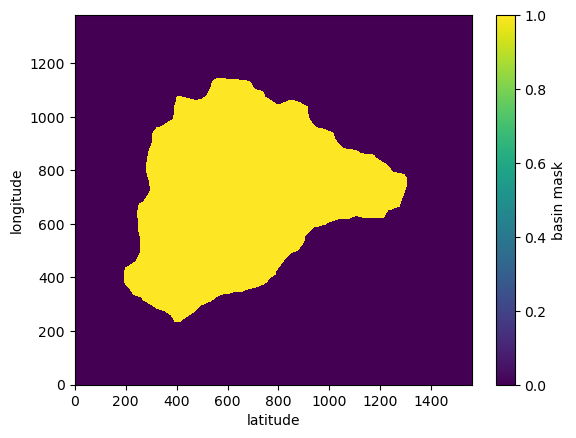

In [14]:
ds.isel(t = 0, clusters = 1).mask.plot()

In [7]:
ds.isel(t = 0, clusters = 1).lonc.values

array(84.69125)

In [8]:
ds.isel(t = 0, clusters = 1).latp.values

array([28.7725    , 28.77166667, 28.77083333, ..., 28.61666667,
       28.61583333, 28.615     ])

In [9]:
ds.isel(t = 0, clusters = 1).latg.values

array([29.1       , 29.09916667, 29.09833333, ..., 27.8025    ,
       27.80166667, 27.80083333])

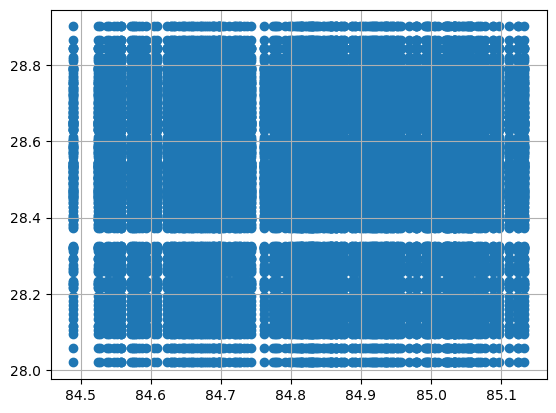

In [12]:
latc = ds_raw.latc.values
lonc = ds_raw.lonc.values

latc_latc, lonc_lonc = np.meshgrid(latc, lonc)

plt.scatter(lonc_lonc, latc_latc)
plt.grid(True)
plt.show()

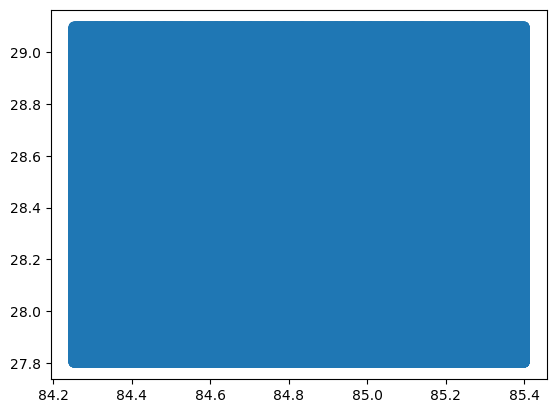

In [11]:
latg = ds_raw.latg.values
long = ds_raw.long.values

latg_latg, long_long = np.meshgrid(latg, long)

plt.scatter(long_long, latg_latg)
plt.show()

In [13]:
latp = ds_raw.latp.values
lonp = ds_raw.lonp.values

latp_latp, lonp_lonp = np.meshgrid(latp, lonp)

plt.scatter(lonp_lonp, latp_latp)
plt.show()

In [68]:
crs_4326 = CRS.from_epsg(4326) # Lat-lon
crs_32645 = CRS.from_epsg(32645) # CRS 

## Create transformer to convert from CRS to CRS

transformer = Transformer.from_crs(crs_4326, crs_32645, always_xy = True)

x, y = transformer.transform(lonc, latc)

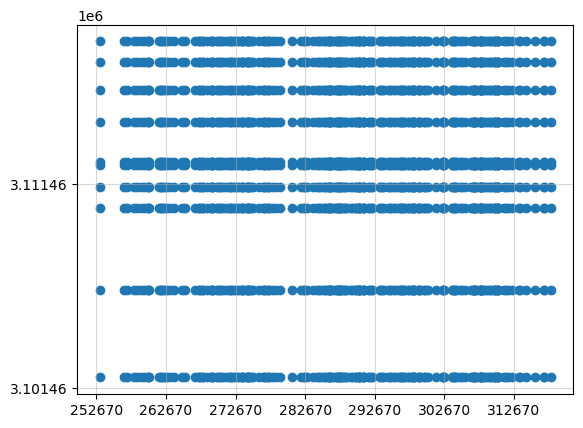

In [130]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_ticks_x = np.arange(252670, 318455, 10000)
major_ticks_y = np.arange(3101459, 3198932, 10000)

#minor_ticks = np.arange(0, 101, 5)
ax.set_xticks(major_ticks_x)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks_y)
#ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
#ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
plt.scatter(xx[:10], yy[:10])
plt.grid(True)

In [101]:
# Dropping unessecary dimensions
ds_cluster = ds_raw.drop_dims(['pixels','latitude', 'longitude'])

In [102]:
# making a dataframe
df = ds_cluster.to_dataframe()

In [107]:
df

T     U     q    LW  SW  P   ps       latc       lonc
t      clusters                                                          
0      0        -2042   168   457  1111   0  0  575  28.717500  84.724583
       1        -1418   181   676  1289   0  0  645  28.504167  84.691250
       2          798   117  1626  1749   0  0  838  28.264167  84.871250
       3        -1039   141   624  1296   0  0  607  28.651667  84.656250
       4        -1619   536   164  1106   0  0  494  28.752500  84.574583
...               ...   ...   ...   ...  .. ..  ...        ...        ...
149015 195      -1005   199   426  1198   0  0  601  28.641667  85.056250
       196      -1868   630   117  1024   0  0  497  28.752500  84.537917
       197      -1875  1023   170   822   0  0  492  28.570000  84.945417
       198      -1515   207   928  1253   0  0  666  28.395833  84.929583
       199      -1811   222   336  1106   0  0  581  28.733333  84.996250

[29803200 rows x 9 columns]

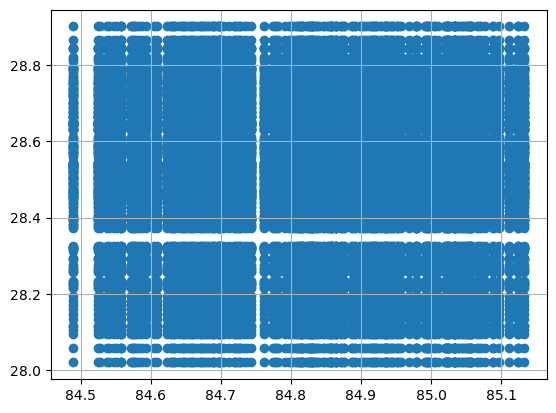

In [73]:
# Making a meshgrid

lonlon, latlat = np.meshgrid(lonc, latc)
plt.scatter(lonlon,latlat)
plt.grid(True)


### Dimensions

* Time, t (149016)
* Clusters, clusters (200)
* Pixels, pixels (571612)
* Latitude, latitude (1560)
* Longitude, longitude (1380)


### Time

The data are hourly starting on the 01.01.1999 00:00 UTC and running to 31.12.2015 23:00 UTC

### Coordinates (EPSG:4326)

* Latitude of cluster centroids [degrees N], latc (clusters)
* Longitude of cluster centroids [degrees E], lonc (clusters)
* Latitude of catchment pixels [degrees N], latp (pixels)
* Longitude of catchment pixels [degrees E], lonp (pixels)
* Latitude grid [degrees N], latg (latitude)
* Longitude grid [degrees E], long (longitude)

### Variables and their dimensions and scaling factors

* 2 m air temperature, T (deg C), (t, clusters): 0.01
* Wind speed, U (m/s), (t, clusters): 0.01
* Specific humidity, q (kg/kg), (t, clusters): 10**-6
* Incoming atmospheric shortwave radiation, SW (W/m^2), (t, clusters): 0.1
* Total precipitation, P (mm h-1), (t, clusters): 0.01
* Surface pressure, ps (Pa), (t, clusters): 100
* Cluster number of each pixel, cn (), (pixels)



In [4]:
# Scaling factors

T_sf = 0.01
P_sf = 0.01
U_sf = 0.01
q_sf = 10**-6
SW_sf = 0.1
ps_sf = 100

In [5]:
# Scaling of variables

## Temperature
T_scaled = ds.T * T_sf
ds = ds.assign(T_scaled = T_scaled)

# Precipitation
P_scaled = ds.P * P_sf
ds = ds.assign(P_scaled = P_scaled)

# Wind
U_scaled = ds.U * U_sf
ds = ds.assign(U_scaled = U_scaled)

# Specific humidity
q_scaled = ds.q * q_sf
ds = ds.assign(q_scaled = q_scaled)

# Shortwave down

SW_scaled = ds.SW * SW_sf
ds = ds.assign(SW_scaled = SW_scaled)

# Pressure
ps_scaled = ds.ps * ps_sf
ds = ds.assign(ps_scaled = ps_scaled)


In [6]:
# Converting timestamps, t, to datetime64
dates = []
start_date = datetime.datetime(1999,1,1)
sec_since_epoch = datetime.datetime.timestamp(start_date)
delta_seconds = ds.t.values * 60 * 60

for i in delta_seconds:
    time = sec_since_epoch + i
    time = np.datetime64(datetime.datetime.fromtimestamp(time))
    dates.append(time)


In [7]:
# Switch dimensions from t to time

##Create a new dimension called 'time'
ds = ds.assign_coords(time=dates)



In [8]:
# Creating a new dataset where variables have the new time dimension
ds_new = xr.Dataset(
    data_vars = dict(
        T = (['time', 'clusters'], ds.T.values),
        U = (['time', 'clusters'], ds.U.values),
        q = (['time', 'clusters'], ds.q.values),
        LW = (['time', 'clusters'], ds.LW.values),
        SW = (['time', 'clusters'], ds.SW.values),
        P = (['time', 'clusters'], ds.P.values),
        ps = (['time', 'clusters'], ds.ps.values),
        latc = (['clusters'], ds.latc.values),
        lonc = (['clusters'], ds.lonc.values),
        latp = (['pixels'], ds.latp.values),
        lonp = (['pixels'], ds.lonp.values),
        cn = (['pixels'], ds.cn.values),
        latg = (['latitude'], ds.latg.values),
        long = (['longitude'], ds.long.values),
        mask = (['longitude', 'latitude'], ds.mask.values),
        T_scaled = (['time', 'clusters'], ds.T_scaled.values),
        P_scaled = (['time', 'clusters'], ds.P_scaled.values),
        U_scaled = (['time', 'clusters'], ds.U_scaled.values),
        q_scaled = (['time', 'clusters'], ds.q_scaled.values),
        SW_scaled = (['time', 'clusters'], ds.SW_scaled.values),
        ps_scaled = (['time', 'clusters'], ds.ps_scaled.values),
    ),
    coords = dict(
        time = (['time'], dates)
    )
    
)

# Preparing data for Shyft

Shyft needs:
* Temperature (deg c)
* Precipitation (mm h^-1)
* SW radiation (W m^-2)
* Relative humidity (kg kg^-1)
* Wind speed (m s^-1)

The new dataset already has:
* Temperature (deg C)
* Wind speed (m s^-1)
* SW radiation (W m^-2)
* Precipitation (mm h^-1)

Therefore we only need to get relative humidity. This can be done using the MetPy package

## Converting pressure from Pa to hPa and getting relative humidity

In [9]:
# To use the relative humidity function from MetPy, the surface pressure must be converted from Pa to hPa

ps_scaled_hpa = ds_new.ps_scaled * 0.01
ds_new = ds_new.assign(ps_scaled_hpa = ps_scaled_hpa)

In [10]:
# Getting relative humidity using the MetPy package. 
# NB! Values are in percent and needs to be multiplied by 0.01 to get fraction
rel_hum_values = relative_humidity_from_specific_humidity(ds_new.ps_scaled_hpa.values * units.hPa, 
                                                        ds.T_scaled.values * units.degC, 
                                                        ds.q_scaled.values).to('percent').magnitude * 0.01

## Getting the altitude for each cluster point

We now have all the forcing variables for Shyft. We also need altitude z and convert the coordinates to X, Y

In [11]:
# First we extract the longitudes and latitudes for the clusters 
# (variables have dimension ('time', 'clusters'))

lonc = ds_new.lonc.values
latc = ds_new.latc.values

In [12]:
# Making a list with a tuple of all (lon, lat) points

lonc_latc_points = []

for i in range(len(lonc)):
    lonc_latc_points.append(Point((lonc[i], latc[i])))

In [13]:
# Make a GeoPandas dataframe with all the clusters and points
gdf = gpd.GeoDataFrame(np.arange(len(lonc_latc_points)), geometry = lonc_latc_points, crs = 4326)

In [14]:
# Make a list of all the points (lon, lat)
coord_list = [(x,y) for x,y in zip(gdf['geometry'].x , gdf['geometry'].y)]

In [15]:
# To get altitude DEM tiles from USGS are merged into one DEM using QGIS and CRS: 4326

## Opening this merged DEM

dem_dataset = rasterio.open('/Users/jacobqs/Documents/MST Himalaya/qgis/DEM/merged_DEM_central_himalaya.tif')

In [16]:
dem_dataset

<open DatasetReader name='/Users/jacobqs/Documents/MST Himalaya/qgis/DEM/merged_DEM_central_himalaya.tif' mode='r'>

In [17]:
# Sample the coordinate points in coord_list in the DEM file
gdf['value'] = [x for x in dem_dataset.sample(coord_list)]

In [18]:
# Getting a list of all z values
z = []
for i in gdf['value'].values:
    z.append(i[0])


We now have all the z values for each cluster in the GeoPandas dataframe, gdf

## Converting from lat, lon to x, y

In [19]:
## Making a pyproj object for UTM Zone 45N

crs_4326 = CRS.from_epsg(4326) # Lat-lon
crs_32645 = CRS.from_epsg(32645) # CRS 

## Create transformer to convert from CRS to CRS

transformer = Transformer.from_crs(crs_4326, crs_32645, always_xy = True)

x, y = transformer.transform(lonc, latc)

## Making new netcdf files for Shyft

Making a new dataset for each variable to make smaller sized files

In [20]:
home_dir = os.getenv("HOME")
wfde5_path = home_dir + '/Documents/MST Himalaya/WFDE5/'
cell_data_path = glob.glob(wfde5_path + 'cell_data/*.nc')
working_dir = '/Users/jacobqs/Documents/MST Himalaya/MST-Himalaya/'
test_path = working_dir + '/shyft_workspace/shyft-data/netcdf/orchestration-testdata/'
temp_test_path = test_path + 'temperature.nc'
relhum_test_path = test_path + 'relative_humidity.nc'
precip_test_path = test_path + 'precipitation.nc'
swdown_test_path = test_path + 'radiation.nc'
wind_test_path = test_path + 'wind_speed.nc'

In [21]:
temp_test = xr.open_mfdataset(temp_test_path)
relhum_test = xr.open_mfdataset(relhum_test_path)
precip_test = xr.open_mfdataset(precip_test_path)
swdown_test = xr.open_mfdataset(swdown_test_path)
wind_test = xr.open_mfdataset(wind_test_path)
cell_data_test = xr.open_mfdataset(cell_data_path)

In [22]:
ds_temperature = xr.Dataset(
    data_vars = dict(
        series_name = (['station'], np.arange(len(ds_new.clusters))),
        crs = ((), np.array(-2147483647, dtype= 'int32')),
        temperature = (['time', 'station'], ds_new.T_scaled.values)
    ),
    coords = dict(
        time = (['time'], ds_new.time.values),
        x = (['station'], x),
        y = (['station'], y),
        z = (['station'], z)
    )  
)

ds_precipitation = xr.Dataset(
    data_vars = dict(
        series_name = (['station'], np.arange(len(ds_new.clusters))),
        crs = ((), np.array(-2147483647, dtype= 'int32')),
        precipitation = (['time', 'station'], ds_new.P_scaled.values)
    ),
    coords = dict(
        time = (['time'], ds_new.time.values),
        x = (['station'], x),
        y = (['station'], y),
        z = (['station'], z)
    )  
)

ds_wind = xr.Dataset(
    data_vars = dict(
        series_name = (['station'], np.arange(len(ds_new.clusters))),
        crs = ((), np.array(-2147483647, dtype= 'int32')),
        wind_speed = (['time', 'station'], ds_new.U_scaled.values)
    ),
    coords = dict(
        time = (['time'], ds_new.time.values),
        x = (['station'], x),
        y = (['station'], y),
        z = (['station'], z)
    )  
)

ds_radiation = xr.Dataset(
    data_vars = dict(
        series_name = (['station'], np.arange(len(ds_new.clusters))),
        crs = ((), np.array(-2147483647, dtype= 'int32')),
        global_radiation = (['time', 'station'], ds_new.SW_scaled.values)
    ),
    coords = dict(
        time = (['time'], ds_new.time.values),
        x = (['station'], x),
        y = (['station'], y),
        z = (['station'], z)
    )  
)

ds_relhum = xr.Dataset(
    data_vars = dict(
        series_name = (['station'], np.arange(len(ds_new.clusters))),
        crs = ((), np.array(-2147483647, dtype= 'int32')),
        relative_humidity = (['time', 'station'], rel_hum_values)
    ),
    coords = dict(
        time = (['time'], ds_new.time.values),
        x = (['station'], x),
        y = (['station'], y),
        z = (['station'], z)
    )  
)

We now have five datasets (1 for each variables) ready to be made into netcdf formats

In [23]:
ds_temperature

<xarray.Dataset>
Dimensions:      (station: 200, time: 149016)
Coordinates:
  * time         (time) datetime64[ns] 1999-01-01 ... 2015-12-31T23:00:00
    x            (station) float64 2.777e+05 2.74e+05 ... 2.972e+05 3.043e+05
    y            (station) float64 3.179e+06 3.155e+06 ... 3.143e+06 3.18e+06
    z            (station) float32 4.702e+03 3.782e+03 ... 3.539e+03 4.647e+03
Dimensions without coordinates: station
Data variables:
    series_name  (station) int64 0 1 2 3 4 5 6 7 ... 193 194 195 196 197 198 199
    crs          int32 -2147483647
    temperature  (time, station) float64 -20.42 -14.18 7.98 ... -15.15 -18.11

In [25]:
# Make a dictionary containing all variables with one dataset for each year
years = ['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', 
        '2010', '2011', '2012', '2013', '2014', '2015']
datasets_ds = dict(
                temperature = ds_temperature,
                precipitation = ds_precipitation,
                wind = ds_wind,
                radiation = ds_radiation,
                relative_humidity = ds_relhum
)

datasets_years = dict()

for name in datasets_ds.keys():
    datasets_years[name] = dict()
    for year in years:
        ds_year = datasets_ds[name].sel(time = year)
        datasets_years[name][year] = ds_year


In [53]:
prec = ds_precipitation.precipitation
z = ds_precipitation.z.values

In [54]:
ds_precipitation

<xarray.Dataset>
Dimensions:        (station: 200, time: 149016)
Coordinates:
  * time           (time) datetime64[ns] 1999-01-01 ... 2015-12-31T23:00:00
    x              (station) float64 2.777e+05 2.74e+05 ... 2.972e+05 3.043e+05
    y              (station) float64 3.179e+06 3.155e+06 ... 3.143e+06 3.18e+06
    z              (station) float32 4.702e+03 3.782e+03 ... 3.539e+03 4.647e+03
Dimensions without coordinates: station
Data variables:
    series_name    (station) int64 0 1 2 3 4 5 6 ... 193 194 195 196 197 198 199
    crs            int32 -2147483647
    precipitation  (time, station) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

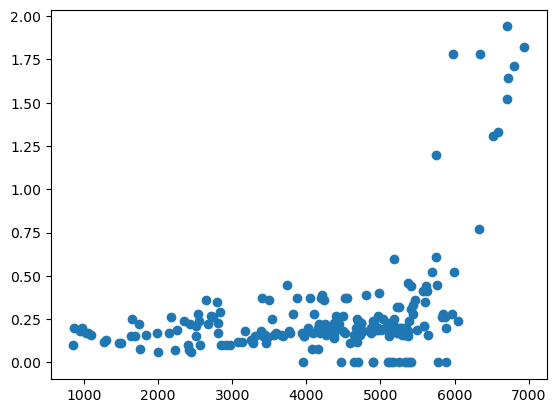

In [52]:
import matplotlib.pyplot as plt
plt.scatter(z, prec)

In [376]:
# Make a net cdf file for eachyear for each variable

for i in datasets_years.keys():
    for j in datasets_years[i].keys():
        datasets_years[i][j].to_netcdf(home_dir + '/Downloads/' + f'{i}_' + f'{j}.nc')

In [379]:
# Create zip files for each netcdf file

for i in datasets_years.keys():
    for j in datasets_years[i].keys():

      # Create a ZipFile Object
      with ZipFile(f'/Users/jacobqs/Downloads/{i}_{j}.nc.zip', 'w') as zip_object:
         # Adding files that need to be zipped
         zip_object.write(f'/Users/jacobqs/Downloads/{i}_{j}.nc')


      # Check to see if the zip file is created
      if os.path.exists(f'/Users/jacobqs/Downloads/{i}_{j}.nc.zip'):
         print("ZIP file created")
      else:
         print("ZIP file not created")

ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file created
ZIP file creat